In [3]:
# Importing necessary libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from matplotlib import pyplot as plt
from qiskit.circuit.library import HGate, CXGate, XGate, ZGate
import numpy as np

In [4]:
# Ignoring deprication (c_if function) warning
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

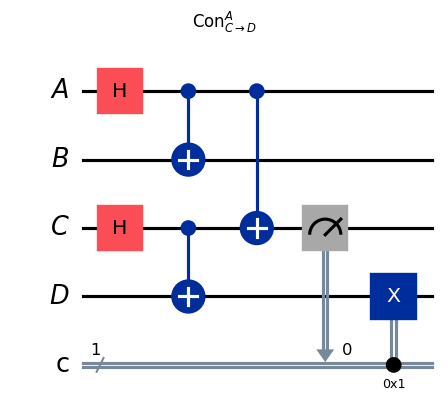

In [5]:
# Connection circuit

# Initialize quantum registers
qreg_a = QuantumRegister(1, name='A')
qreg_b = QuantumRegister(1, name='B')
qreg_c = QuantumRegister(1, name='C')
qreg_d = QuantumRegister(1, name='D')

# Initialize classical register for X gate usage
creg_c = ClassicalRegister(1, name='c')

# Initialize quantum gates
h_gate = HGate()
cx_gate = CXGate()
x_gate = XGate()

# Initialize quantum circuit
qc = QuantumCircuit(qreg_a, qreg_b, qreg_c, qreg_d, creg_c)

# Adding gates and measurement to the circuit
qc.append(h_gate, [0])
qc.append(h_gate, [2])
qc.append(cx_gate, [0,1])
qc.append(cx_gate, [2,3])
qc.append(cx_gate, [0,2])

qc.measure(qreg_c, creg_c)
qc.append(x_gate, [3]).c_if(creg_c, 1)

# Plotting circuit
fix, ax = plt.subplots()
qc.draw("mpl", ax=ax)
plt.title(r"Con$^{A}_{C\to D}$")
plt.show()

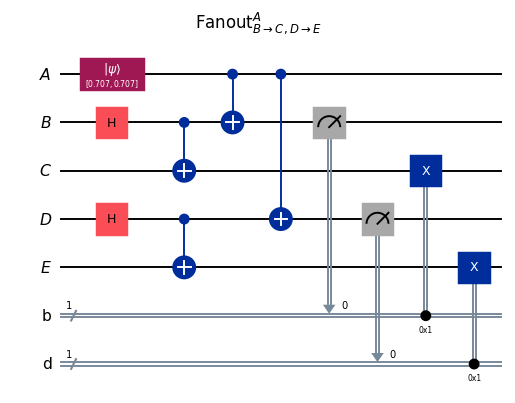

In [6]:
# Connection:Fanout circuit

# Initialize quantum registers
qreg_a = QuantumRegister(1, name='A')
qreg_b = QuantumRegister(1, name='B')
qreg_c = QuantumRegister(1, name='C')
qreg_d = QuantumRegister(1, name='D')
qreg_e = QuantumRegister(1, name='E')

# Initialize classical registers for X gate usages
creg_b = ClassicalRegister(1, name='b')
creg_d = ClassicalRegister(1, name='d')

# Initialize quantum gates
h_gate = HGate()
cx_gate = CXGate()
x_gate = XGate()

# Initialize quantum circuit
qc = QuantumCircuit(qreg_a, qreg_b, qreg_c, qreg_d, qreg_e, creg_b, creg_d)

# Initialize A quantum register to superposition
alpha = 1/np.sqrt(2)
beta = 1/np.sqrt(2)
qc.initialize([alpha, beta], qreg_a)

# Adding gates and measurement to the circuit
qc.append(h_gate, [1])
qc.append(h_gate, [3])
qc.append(cx_gate, [1,2])
qc.append(cx_gate, [3,4])
qc.append(cx_gate, [0,1])
qc.append(cx_gate, [0,3])

qc.measure(qreg_b, creg_b)
qc.measure(qreg_d, creg_d)
qc.append(x_gate, [2]).c_if(creg_b, 1)
qc.append(x_gate, [4]).c_if(creg_d, 1)

# Plotting circuit
fix, ax = plt.subplots()
qc.draw("mpl", ax=ax)
plt.title(r"Fanout$^{A}_{B\to C,D\to E}$")
plt.show()

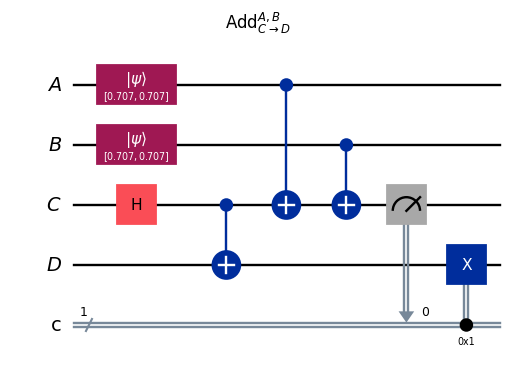

In [7]:
# Connection:Add circuit

# Initialize quantum registers
qreg_a = QuantumRegister(1, name='A')
qreg_b = QuantumRegister(1, name='B')
qreg_c = QuantumRegister(1, name='C')
qreg_d = QuantumRegister(1, name='D')

# Initialize classical register for X gate usages
creg_c = ClassicalRegister(1, name='c')

# Initialize quantum gates
h_gate = HGate()
cx_gate = CXGate()
x_gate = XGate()

# Initialize quantum circuit
qc = QuantumCircuit(qreg_a, qreg_b, qreg_c, qreg_d, creg_c)

# Initialize A and B quantum registers to superposition
alpha = 1/np.sqrt(2)
beta = 1/np.sqrt(2)
gamma = 1/np.sqrt(2)
delta = 1/np.sqrt(2)
qc.initialize([alpha, beta], qreg_a)
qc.initialize([gamma, delta], qreg_b)

# Adding gates and measurement to the circuit
qc.append(h_gate, [2])
qc.append(cx_gate, [2,3])
qc.append(cx_gate, [0,2])
qc.append(cx_gate, [1,2])

qc.measure(qreg_c, creg_c)
qc.append(x_gate, [3]).c_if(creg_c, 1)

# Plotting circuit
fix, ax = plt.subplots()
qc.draw("mpl", ax=ax)
plt.title(r"Add$^{A,B}_{C\to D}$")
plt.show()

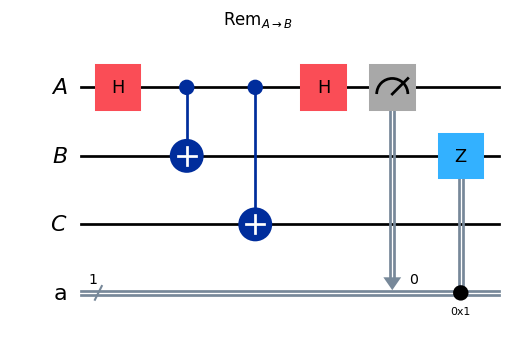

In [8]:
# Removal circuit

# Initialize quantum registers
qreg_a = QuantumRegister(1, name='A')
qreg_b = QuantumRegister(1, name='B')
qreg_c = QuantumRegister(1, name='C')

# Initialize classical registers for Z gate usage
creg_a = ClassicalRegister(1, name='a')

# Initialize quantum gates
h_gate = HGate()
cx_gate = CXGate()
z_gate = ZGate()

# Initialize quantum circuit
qc = QuantumCircuit(qreg_a, qreg_b, qreg_c, creg_a)

# Adding gates and measurement to the circuit
qc.append(h_gate, [0])
qc.append(cx_gate, [0,1])
qc.append(cx_gate, [0,2])
qc.append(h_gate, [0])

qc.measure(qreg_a, creg_a)
qc.append(z_gate, [1]).c_if(creg_a, 1)

# Plotting circuit
fix, ax = plt.subplots()
qc.draw("mpl", ax=ax)
plt.title(r"Rem$_{A\to B}$")
plt.show()

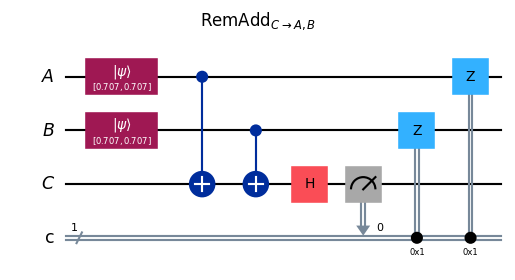

In [9]:
# Removal:Add circuit

# Initialize quantum registers
qreg_a = QuantumRegister(1, name='A')
qreg_b = QuantumRegister(1, name='B')
qreg_c = QuantumRegister(1, name='C')

# Initialize classical registers for Z gate usages
creg_c = ClassicalRegister(1, name='c')

# Initialize quantum gates
h_gate = HGate()
cx_gate = CXGate()
z_gate = ZGate()

# Initialize quantum circuit
qc = QuantumCircuit(qreg_a, qreg_b, qreg_c, creg_c)

# Initialize A and B quantum registers to superposition
alpha = 1/np.sqrt(2)
beta = 1/np.sqrt(2)
gamma = 1/np.sqrt(2)
delta = 1/np.sqrt(2)
qc.initialize([alpha, beta], qreg_a)
qc.initialize([gamma, delta], qreg_b)

# Adding gates and measurement to the circuit
qc.append(cx_gate, [0,2])
qc.append(cx_gate, [1,2])
qc.append(h_gate, [2])

qc.measure(qreg_c, creg_c)
qc.append(z_gate, [1]).c_if(creg_c, 1)
qc.append(z_gate, [0]).c_if(creg_c, 1)

# Plotting circuit
fix, ax = plt.subplots()
qc.draw("mpl", ax=ax)
plt.title(r"RemAdd$_{C\to A,B}$")
plt.show()

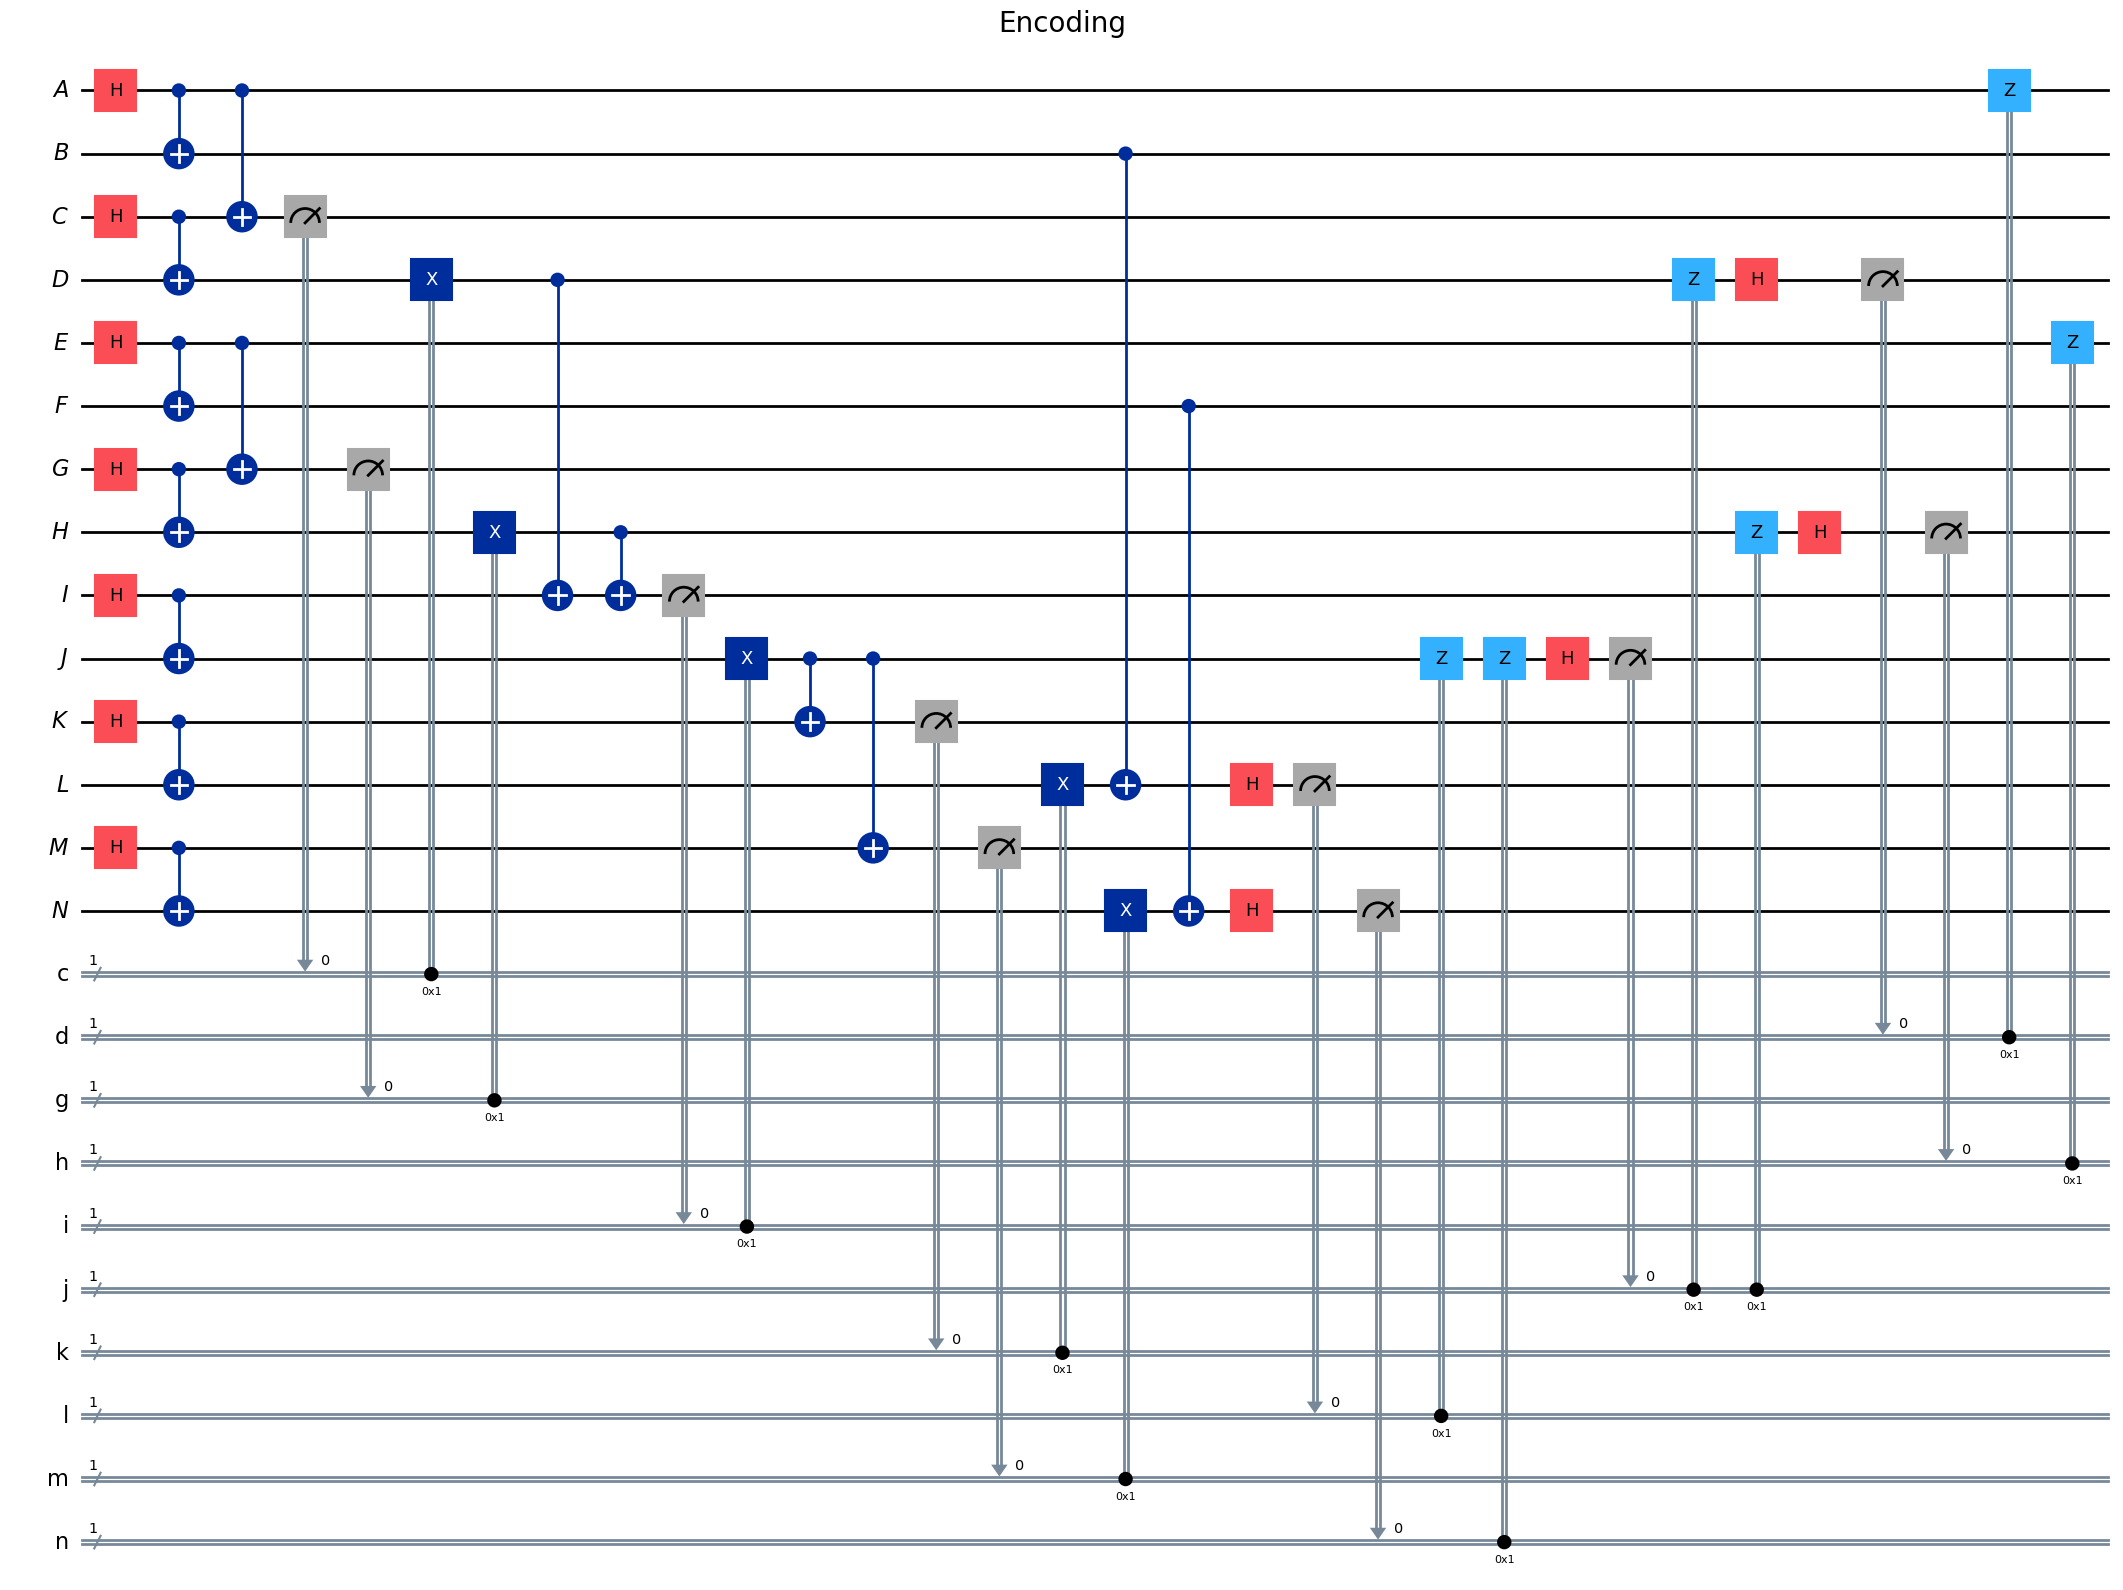

In [11]:
# Encoding circuit

# Initialize quantum registers
qreg_a = QuantumRegister(1, name='A')
qreg_b = QuantumRegister(1, name='B')
qreg_c = QuantumRegister(1, name='C')
qreg_d = QuantumRegister(1, name='D')
qreg_e = QuantumRegister(1, name='E')
qreg_f = QuantumRegister(1, name='F')
qreg_g = QuantumRegister(1, name='G')
qreg_h = QuantumRegister(1, name='H')
qreg_i = QuantumRegister(1, name='I')
qreg_j = QuantumRegister(1, name='J')
qreg_k = QuantumRegister(1, name='K')
qreg_l = QuantumRegister(1, name='L')
qreg_m = QuantumRegister(1, name='M')
qreg_n = QuantumRegister(1, name='N')

# Initialize classical registers for X and Z gate usages
creg_c = ClassicalRegister(1, name='c')
creg_d = ClassicalRegister(1, name='d')
creg_g = ClassicalRegister(1, name='g')
creg_h = ClassicalRegister(1, name='h')
creg_i = ClassicalRegister(1, name='i')
creg_j = ClassicalRegister(1, name='j')
creg_k = ClassicalRegister(1, name='k')
creg_l = ClassicalRegister(1, name='l')
creg_m = ClassicalRegister(1, name='m')
creg_n = ClassicalRegister(1, name='n')

# Initialize quantum gates
h_gate = HGate()
cx_gate = CXGate()
x_gate = XGate()
z_gate = ZGate()

# Initialize quantum circuit
qc = QuantumCircuit(qreg_a, qreg_b, qreg_c, qreg_d, qreg_e, qreg_f, qreg_g, qreg_h, qreg_i, qreg_j, qreg_k, qreg_l, qreg_m, qreg_n, creg_c, creg_d, creg_g, creg_h, creg_i, creg_j, creg_k, creg_l, creg_m, creg_n)

# Adding gates and measurement to the circuit

# Input
qc.append(h_gate, [0])
qc.append(h_gate, [2])
qc.append(h_gate, [4])
qc.append(h_gate, [6])
qc.append(h_gate, [8])
qc.append(h_gate, [10])
qc.append(h_gate, [12])
qc.append(cx_gate, [0,1])
qc.append(cx_gate, [2,3])
qc.append(cx_gate, [4,5])
qc.append(cx_gate, [6,7])
qc.append(cx_gate, [8,9])
qc.append(cx_gate, [10,11])
qc.append(cx_gate, [12,13])

# Step 1
qc.append(cx_gate, [0,2])
qc.append(cx_gate, [4,6])
qc.measure(qreg_c, creg_c)
qc.measure(qreg_g, creg_g)
qc.append(x_gate, [3]).c_if(creg_c, 1)
qc.append(x_gate, [7]).c_if(creg_g, 1)

# Step 2
qc.append(cx_gate, [3,8])
qc.append(cx_gate, [7,8])
qc.measure(qreg_i, creg_i)
qc.append(x_gate, [9]).c_if(creg_i, 1)

# Step 3
qc.append(cx_gate, [9,10])
qc.append(cx_gate, [9,12])
qc.measure(qreg_k, creg_k)
qc.measure(qreg_m, creg_m)
qc.append(x_gate, [11]).c_if(creg_k, 1)
qc.append(x_gate, [13]).c_if(creg_m, 1)

# Step 4
qc.append(cx_gate, [1,11])
qc.append(cx_gate, [5,13])

# Step 5
qc.append(h_gate, [11])
qc.append(h_gate, [13])
qc.measure(qreg_l, creg_l)
qc.measure(qreg_n, creg_n)
qc.append(z_gate, [9]).c_if(creg_l, 1)
qc.append(z_gate, [9]).c_if(creg_n, 1)

# Step 6
qc.append(h_gate, [9])
qc.measure(qreg_j, creg_j)
qc.append(z_gate, [3]).c_if(creg_j, 1)
qc.append(z_gate, [7]).c_if(creg_j, 1)

# Step 7
qc.append(h_gate, [3])
qc.append(h_gate, [7])
qc.measure(qreg_d, creg_d)
qc.measure(qreg_h, creg_h)
qc.append(z_gate, [0]).c_if(creg_d, 1)
qc.append(z_gate, [4]).c_if(creg_h, 1)

# Plotting circuit
fix, ax = plt.subplots(figsize=(30, 20))
qc.draw("mpl", ax=ax, fold=-1)
plt.title("Encoding", fontsize=20)
plt.show()